In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os


In [2]:
file = open("word generator.txt", 'r', encoding ='utf-8')
lines = []

for i in file:
  lines.append(i)

print("baris pertama\t:", lines[0])
print("baris terakhir\t:", lines[-1])

baris pertama	: a.b.

baris terakhir	: zus


Data Cleaning

In [3]:
data = ''
for i in lines:
  data = ' '.join(lines)

data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '')
data[:39070]

'a.b. a.md. a.n. a.p. a.pkt. a.s. aal aau aba aba-aba abad abadiah abah abah-abah abai abaian abaimana abaka abakus abal-abal abalone abampere aban abandira abandonemen abang abangan abangga abar abar-abar abaran abasia abat abate abatisasi abatoar abau abawi abaya abdi abdikasi abdomen abduksi abduktor abdusen abe abece aberasi abet abg abian abid abidin abilah abing abiogenesis abiosen abioseston abiosfer abiotik abiotrofi abis abisal abiseka abisobentos abisopelagik abit abiturien abjad abjeksi abk ablasi ablastin ablaut ableisme ablepsia abnon abnormalitas abnus abo aboi abolisi abomasum abon abone abonemen aboospora aborigin aborsi abortiva abortus abpar abrab abrak abrakadabra abras abrasi abrasif abreaksi abreviasi abri abrikos abrin abrip abripda abriptu abrogasi abrosfer abrupsi abs absensi absente absenteisme abses absis absisi absolusi absolutisme absorbat absorben absorpsi absorpsiometer absorptans absorptivitas abstensi abstinensi abstrak abstraksi abstraksionisme absurdis

In [4]:
import string

translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space
new_data = data.translate(translator)

new_data[:39070]

'a b  a md  a n  a p  a pkt  a s  aal aau aba aba aba abad abadiah abah abah abah abai abaian abaimana abaka abakus abal abal abalone abampere aban abandira abandonemen abang abangan abangga abar abar abar abaran abasia abat abate abatisasi abatoar abau abawi abaya abdi abdikasi abdomen abduksi abduktor abdusen abe abece aberasi abet abg abian abid abidin abilah abing abiogenesis abiosen abioseston abiosfer abiotik abiotrofi abis abisal abiseka abisobentos abisopelagik abit abiturien abjad abjeksi abk ablasi ablastin ablaut ableisme ablepsia abnon abnormalitas abnus abo aboi abolisi abomasum abon abone abonemen aboospora aborigin aborsi abortiva abortus abpar abrab abrak abrakadabra abras abrasi abrasif abreaksi abreviasi abri abrikos abrin abrip abripda abriptu abrogasi abrosfer abrupsi abs absensi absente absenteisme abses absis absisi absolusi absolutisme absorbat absorben absorpsi absorpsiometer absorptans absorptivitas abstensi abstinensi abstrak abstraksi abstraksionisme absurdis

In [5]:
z = []

for i in data.split():
    if i not in z:
        z.append(i)
        
data = ' '.join(z)
data[:39070]

'a.b. a.md. a.n. a.p. a.pkt. a.s. aal aau aba aba-aba abad abadiah abah abah-abah abai abaian abaimana abaka abakus abal-abal abalone abampere aban abandira abandonemen abang abangan abangga abar abar-abar abaran abasia abat abate abatisasi abatoar abau abawi abaya abdi abdikasi abdomen abduksi abduktor abdusen abe abece aberasi abet abg abian abid abidin abilah abing abiogenesis abiosen abioseston abiosfer abiotik abiotrofi abis abisal abiseka abisobentos abisopelagik abit abiturien abjad abjeksi abk ablasi ablastin ablaut ableisme ablepsia abnon abnormalitas abnus abo aboi abolisi abomasum abon abone abonemen aboospora aborigin aborsi abortiva abortus abpar abrab abrak abrakadabra abras abrasi abrasif abreaksi abreviasi abri abrikos abrin abrip abripda abriptu abrogasi abrosfer abrupsi abs absensi absente absenteisme abses absis absisi absolusi absolutisme absorbat absorben absorpsi absorpsiometer absorptans absorptivitas abstensi abstinensi abstrak abstraksi abstraksionisme absurdis

Tokenization

In [6]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function.
pickle.dump(tokenizer, open('tokenizer1.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:10]

[6, 9, 6, 810, 6, 27, 6, 5, 6, 359]

In [7]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

38354


In [8]:
sequences = []

for i in range(1, len(sequence_data)):
    words = sequence_data[i-1:i+1]
    sequences.append(words)
    
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  40022


array([[  6,   9],
       [  9,   6],
       [  6, 810],
       [810,   6],
       [  6,  27],
       [ 27,   6],
       [  6,   5],
       [  5,   6],
       [  6, 359],
       [359,   6]])

In [9]:
X = []
y = []

for i in sequences:
    X.append(i[0])
    y.append(i[1])
    
X = np.array(X)
y = np.array(y)

In [10]:
print("The Data is: ", X[:5])
print("The responses are: ", y[:5])

The Data is:  [  6   9   6 810   6]
The responses are:  [  9   6 810   6  27]


In [11]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Modelling

In [12]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=1))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 10)             383540    
                                                                 
 lstm (LSTM)                 (None, 1, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 38354)             38392354  
                                                                 
Total params: 51,824,894
Trainable params: 51,824,894
Non-trainable params: 0
_________________________________________________________________


Plot The Model

In [20]:
%pip install pydot

In [21]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model
import pydot

keras.utils.plot_model(model, to_file='model.png', show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


Callbacks

In [22]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import TensorBoard

checkpoint = ModelCheckpoint("nextword1.h5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto')

reduce = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=0.0001, verbose = 1)

logdir='logsnextword1'
tensorboard_Visualization = TensorBoard(log_dir=logdir)

Compile The Model

In [23]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001))

Fit The Model

In [24]:
model.fit(X, y, epochs=5, batch_size=64, callbacks=[checkpoint, reduce, tensorboard_Visualization])


Epoch 1/5
626/626 [==============================] - ETA: 0s - loss: 10.6440
Epoch 1: loss improved from inf to 10.64397, saving model to nextword1.h5
626/626 [==============================] - 340s 533ms/step - loss: 10.6440 - lr: 0.0010
Epoch 2/5
626/626 [==============================] - ETA: 0s - loss: 10.5596
Epoch 2: loss improved from 10.64397 to 10.55961, saving model to nextword1.h5
626/626 [==============================] - 297s 475ms/step - loss: 10.5596 - lr: 0.0010
Epoch 3/5
626/626 [==============================] - ETA: 0s - loss: 10.5562
Epoch 3: loss improved from 10.55961 to 10.55622, saving model to nextword1.h5
626/626 [==============================] - 277s 443ms/step - loss: 10.5562 - lr: 0.0010
Epoch 4/5
626/626 [==============================] - ETA: 0s - loss: 10.5532
Epoch 4: loss improved from 10.55622 to 10.55317, saving model to nextword1.h5
626/626 [==============================] - 273s 437ms/step - loss: 10.5532 - lr: 0.0010
Epoch 5/5
626/626 [==========

Kita buat Graph untuk visualisasinya ya! 


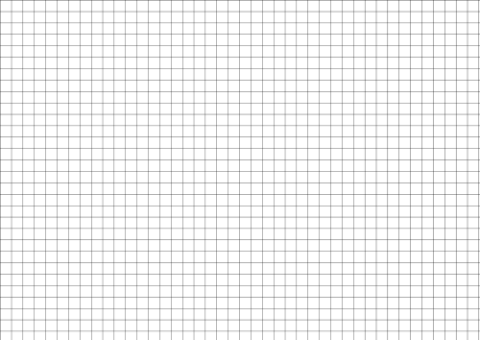

In [27]:
from IPython.display import Image 
pil_img = Image(filename='graph.png')
display(pil_img)

Prediksi Model

In [37]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle

# Load the model and tokenizer

model = load_model('nextword1.h5')
tokenizer = pickle.load(open('tokenizer1.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):
    """
        Dalam fungsi ini kita menggunakan tokenizer dan model yang dilatih
        dan kami membuat urutan teks yang dimasukkan dan kemudian
        menggunakan model kami untuk memprediksi dan mengembalikan kata yang diprediksi.
    
    """
    for i in range(3):
        sequence = tokenizer.texts_to_sequences([text])[0]
        sequence = np.array(sequence)
        
        preds = model.predict_classes(sequence)
#         print(preds)
        predicted_word = ""
        
        for key, value in tokenizer.word_index.items():
            if value == preds:
                predicted_word = key
                break
        
        print(predicted_word)
        return predicted_word

In [39]:
"""
    Kami sedang menguji model kami dan kami akan menjalankan model
    sampai pengguna memutuskan untuk menghentikan skrip.
    Saat skrip berjalan, kami mencoba dan memeriksa apakah 
    prediksi dapat dibuat pada teks. Jika tidak ada
    prediksi bisa dibuat kita lanjutkan saja.

"""

# text1 = "di tempat yang membosankan"
# text2 = "koleksi tekstil"
# text3 = "sungguh berat"
# text4 = "menghentikan skrip"

while(True):

    text = input("Enter your line: ")
    
    if text == "stop the script":
        print("Ending The Program.....")
        break
    
    else:
        try:
            text = text.split(" ")
            text = text[-1]

            text = ''.join(text)
            Predict_Next_Words(model, tokenizer, text)
            
        except:
            continue

Ending The Program.....
